In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import pylab as pl

In [2]:
df = pd.read_csv('C:\\Users\\Federico\\Downloads\\Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
dati_mancanti = df.isnull()

In [5]:
for column in dati_mancanti.columns.values.tolist():
    print(column)
    print(dati_mancanti[column].value_counts())
    print('')

price
False    545
Name: price, dtype: int64

area
False    545
Name: area, dtype: int64

bedrooms
False    545
Name: bedrooms, dtype: int64

bathrooms
False    545
Name: bathrooms, dtype: int64

stories
False    545
Name: stories, dtype: int64

mainroad
False    545
Name: mainroad, dtype: int64

guestroom
False    545
Name: guestroom, dtype: int64

basement
False    545
Name: basement, dtype: int64

hotwaterheating
False    545
Name: hotwaterheating, dtype: int64

airconditioning
False    545
Name: airconditioning, dtype: int64

parking
False    545
Name: parking, dtype: int64

prefarea
False    545
Name: prefarea, dtype: int64

furnishingstatus
False    545
Name: furnishingstatus, dtype: int64



In [6]:
avg_price = df['price'].astype('float').mean(axis=0)
avg_price

4766729.247706422

In [7]:
avg_area = df['area'].astype('float').mean(axis=0)
avg_area

5150.54128440367

In [8]:
df['bathrooms'].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [9]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [10]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
df['bedrooms'] = df['bedrooms']/df['bedrooms'].max()
df['bathrooms'] = df['bathrooms']/df['bathrooms'].max()

In [12]:
df[['bedrooms', 'bathrooms']].head()

,bedrooms,bathrooms
0,0.666667,0.50
1,0.666667,1.00
2,0.500000,0.50
3,0.666667,0.50
4,0.666667,0.25


Text(0.5, 1.0, 'area')

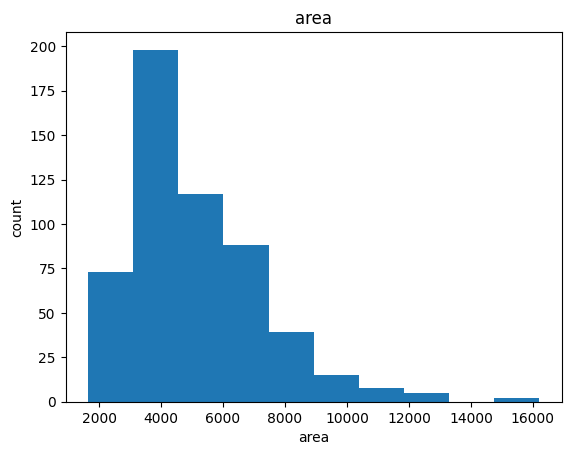

In [13]:
import matplotlib as plt 
from matplotlib import pyplot 
%matplotlib inline 
plt.pyplot.hist(df['area'])
plt.pyplot.xlabel('area')
plt.pyplot.ylabel('count')
plt.pyplot.title('area')

In [14]:
bins = np.linspace(min(df['area']), max(df['area']), 4)

In [15]:
nome_gruppi = ['Bassa', 'Media', 'Alta']

In [16]:
df['area binnata'] = pd.cut(df['area'], bins, labels=nome_gruppi, include_lowest=True)
df[['area', 'area binnata']]

,area,area binnata
0,7420,Media
1,8960,Media
2,9960,Media
3,7500,Media
4,7420,Media
...,...,...
540,3000,Bassa
541,2400,Bassa
542,3620,Bassa
543,2910,Bassa


In [17]:
df['area binnata'].value_counts()

Bassa    422
Media    113
Alta      10
Name: area binnata, dtype: int64

Text(0.5, 1.0, 'binnaggio area')

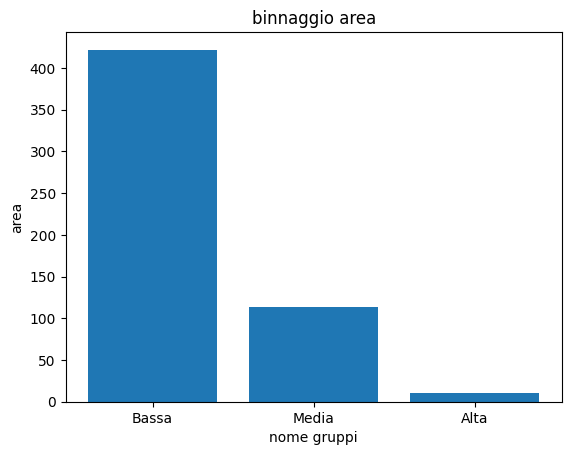

In [18]:
plt.pyplot.bar(nome_gruppi, df['area binnata'].value_counts())
plt.pyplot.xlabel('nome gruppi')
plt.pyplot.ylabel('area')
plt.pyplot.title('binnaggio area')

In [19]:
variabile_dummy = pd.get_dummies(df['guestroom'])
variabile_dummy.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
variabile_dummy.rename(columns={'no':'no guestroom', 'yes':'yes guestroom'}, inplace=True) 
variabile_dummy.head()

,no guestroom,yes guestroom
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
df = pd.concat([df, variabile_dummy], axis=1)


In [22]:
df.drop(['guestroom'], axis=1, inplace=True)

In [23]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area binnata,no guestroom,yes guestroom
0,13300000,7420,0.666667,0.50,3,yes,no,no,yes,2,yes,furnished,Media,1,0
1,12250000,8960,0.666667,1.00,4,yes,no,no,yes,3,no,furnished,Media,1,0
2,12250000,9960,0.500000,0.50,2,yes,yes,no,no,2,yes,semi-furnished,Media,1,0
3,12215000,7500,0.666667,0.50,2,yes,yes,no,yes,3,yes,furnished,Media,1,0
4,11410000,7420,0.666667,0.25,2,yes,yes,no,yes,2,no,furnished,Media,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0.333333,0.25,1,yes,yes,no,no,2,no,unfurnished,Bassa,1,0
541,1767150,2400,0.500000,0.25,1,no,no,no,no,0,no,semi-furnished,Bassa,1,0
542,1750000,3620,0.333333,0.25,1,yes,no,no,no,0,no,unfurnished,Bassa,1,0
543,1750000,2910,0.500000,0.25,1,no,no,no,no,0,no,furnished,Bassa,1,0


In [24]:
variabile_dummy2 = pd.get_dummies(df['prefarea']) 
variabile_dummy2.head()

,no,yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [25]:
variabile_dummy2.rename(columns={'no':'no prefarea', 'yes':'yes prefarea'}, inplace=True)
variabile_dummy2.head()

,no prefarea,yes prefarea
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [26]:
df = pd.concat([df, variabile_dummy2], axis=1) 

In [27]:
df.drop(['prefarea'], axis=1, inplace=True)

In [28]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,area binnata,no guestroom,yes guestroom,no prefarea,yes prefarea
0,13300000,7420,0.666667,0.50,3,yes,no,no,yes,2,furnished,Media,1,0,0,1
1,12250000,8960,0.666667,1.00,4,yes,no,no,yes,3,furnished,Media,1,0,1,0
2,12250000,9960,0.500000,0.50,2,yes,yes,no,no,2,semi-furnished,Media,1,0,0,1
3,12215000,7500,0.666667,0.50,2,yes,yes,no,yes,3,furnished,Media,1,0,0,1
4,11410000,7420,0.666667,0.25,2,yes,yes,no,yes,2,furnished,Media,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0.333333,0.25,1,yes,yes,no,no,2,unfurnished,Bassa,1,0,1,0
541,1767150,2400,0.500000,0.25,1,no,no,no,no,0,semi-furnished,Bassa,1,0,1,0
542,1750000,3620,0.333333,0.25,1,yes,no,no,no,0,unfurnished,Bassa,1,0,1,0
543,1750000,2910,0.500000,0.25,1,no,no,no,no,0,furnished,Bassa,1,0,1,0


In [29]:
variabile_dummy3 = pd.get_dummies(df['basement']) 
variabile_dummy3.head()

,no,yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [30]:
variabile_dummy3.rename(columns={'no':'no basement', 'yes':'yes basement'}, inplace=True) 
variabile_dummy3.head()

,no basement,yes basement
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [31]:
df = pd.concat([df, variabile_dummy3], axis=1) 
df.drop(['basement'], axis=1, inplace=True)

In [32]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,hotwaterheating,airconditioning,parking,furnishingstatus,area binnata,no guestroom,yes guestroom,no prefarea,yes prefarea,no basement,yes basement
0,13300000,7420,0.666667,0.50,3,yes,no,yes,2,furnished,Media,1,0,0,1,1,0
1,12250000,8960,0.666667,1.00,4,yes,no,yes,3,furnished,Media,1,0,1,0,1,0
2,12250000,9960,0.500000,0.50,2,yes,no,no,2,semi-furnished,Media,1,0,0,1,0,1
3,12215000,7500,0.666667,0.50,2,yes,no,yes,3,furnished,Media,1,0,0,1,0,1
4,11410000,7420,0.666667,0.25,2,yes,no,yes,2,furnished,Media,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0.333333,0.25,1,yes,no,no,2,unfurnished,Bassa,1,0,1,0,0,1
541,1767150,2400,0.500000,0.25,1,no,no,no,0,semi-furnished,Bassa,1,0,1,0,1,0
542,1750000,3620,0.333333,0.25,1,yes,no,no,0,unfurnished,Bassa,1,0,1,0,1,0
543,1750000,2910,0.500000,0.25,1,no,no,no,0,furnished,Bassa,1,0,1,0,1,0


In [33]:
variabile_dummy4 = pd.get_dummies(df['mainroad'])
variabile_dummy4.head()


,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
variabile_dummy4.rename(columns={'no':'no mainroad', 'yes':'yes mainroad'}, inplace=True)
variabile_dummy4.head()

,no mainroad,yes mainroad
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
df = pd.concat([df, variabile_dummy4], axis=1) 
df.drop(['mainroad'], axis=1, inplace=True) 
df

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,furnishingstatus,area binnata,no guestroom,yes guestroom,no prefarea,yes prefarea,no basement,yes basement,no mainroad,yes mainroad
0,13300000,7420,0.666667,0.50,3,no,yes,2,furnished,Media,1,0,0,1,1,0,0,1
1,12250000,8960,0.666667,1.00,4,no,yes,3,furnished,Media,1,0,1,0,1,0,0,1
2,12250000,9960,0.500000,0.50,2,no,no,2,semi-furnished,Media,1,0,0,1,0,1,0,1
3,12215000,7500,0.666667,0.50,2,no,yes,3,furnished,Media,1,0,0,1,0,1,0,1
4,11410000,7420,0.666667,0.25,2,no,yes,2,furnished,Media,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0.333333,0.25,1,no,no,2,unfurnished,Bassa,1,0,1,0,0,1,0,1
541,1767150,2400,0.500000,0.25,1,no,no,0,semi-furnished,Bassa,1,0,1,0,1,0,1,0
542,1750000,3620,0.333333,0.25,1,no,no,0,unfurnished,Bassa,1,0,1,0,1,0,0,1
543,1750000,2910,0.500000,0.25,1,no,no,0,furnished,Bassa,1,0,1,0,1,0,1,0


In [36]:
variabile_dummy5 = pd.get_dummies(df['hotwaterheating'])
variabile_dummy5.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
variabile_dummy5.rename(columns={'no':'no hotwaterheating', 'yes':'yes hotwaterheating'}, inplace=True)
variabile_dummy5.head()

,no hotwaterheating,yes hotwaterheating
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [38]:
df = pd.concat([df, variabile_dummy5], axis=1)
df.drop(['hotwaterheating'], axis=1, inplace=True)
df

,price,area,bedrooms,bathrooms,stories,airconditioning,parking,furnishingstatus,area binnata,no guestroom,yes guestroom,no prefarea,yes prefarea,no basement,yes basement,no mainroad,yes mainroad,no hotwaterheating,yes hotwaterheating
0,13300000,7420,0.666667,0.50,3,yes,2,furnished,Media,1,0,0,1,1,0,0,1,1,0
1,12250000,8960,0.666667,1.00,4,yes,3,furnished,Media,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,0.500000,0.50,2,no,2,semi-furnished,Media,1,0,0,1,0,1,0,1,1,0
3,12215000,7500,0.666667,0.50,2,yes,3,furnished,Media,1,0,0,1,0,1,0,1,1,0
4,11410000,7420,0.666667,0.25,2,yes,2,furnished,Media,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0.333333,0.25,1,no,2,unfurnished,Bassa,1,0,1,0,0,1,0,1,1,0
541,1767150,2400,0.500000,0.25,1,no,0,semi-furnished,Bassa,1,0,1,0,1,0,1,0,1,0
542,1750000,3620,0.333333,0.25,1,no,0,unfurnished,Bassa,1,0,1,0,1,0,0,1,1,0
543,1750000,2910,0.500000,0.25,1,no,0,furnished,Bassa,1,0,1,0,1,0,1,0,1,0


In [40]:
variabile_dummy6 = pd.get_dummies(df['airconditioning']) 
variabile_dummy6.head()

,no,yes
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [41]:
variabile_dummy6.rename(columns={'no':'no airconditioning', 'yes':'yes airconditioning'}, inplace=True)
variabile_dummy6.head()

,no airconditioning,yes airconditioning
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [42]:
df = pd.concat([df, variabile_dummy6], axis=1) 
df.drop(['airconditioning'], axis=1, inplace=True) 
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,area binnata,no guestroom,yes guestroom,no prefarea,yes prefarea,no basement,yes basement,no mainroad,yes mainroad,no hotwaterheating,yes hotwaterheating,no airconditioning,yes airconditioning
0,13300000,7420,0.666667,0.50,3,2,furnished,Media,1,0,0,1,1,0,0,1,1,0,0,1
1,12250000,8960,0.666667,1.00,4,3,furnished,Media,1,0,1,0,1,0,0,1,1,0,0,1
2,12250000,9960,0.500000,0.50,2,2,semi-furnished,Media,1,0,0,1,0,1,0,1,1,0,1,0
3,12215000,7500,0.666667,0.50,2,3,furnished,Media,1,0,0,1,0,1,0,1,1,0,0,1
4,11410000,7420,0.666667,0.25,2,2,furnished,Media,0,1,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0.333333,0.25,1,2,unfurnished,Bassa,1,0,1,0,0,1,0,1,1,0,1,0
541,1767150,2400,0.500000,0.25,1,0,semi-furnished,Bassa,1,0,1,0,1,0,1,0,1,0,1,0
542,1750000,3620,0.333333,0.25,1,0,unfurnished,Bassa,1,0,1,0,1,0,0,1,1,0,1,0
543,1750000,2910,0.500000,0.25,1,0,furnished,Bassa,1,0,1,0,1,0,1,0,1,0,1,0


In [48]:
import matplotlib.pyplot as plt

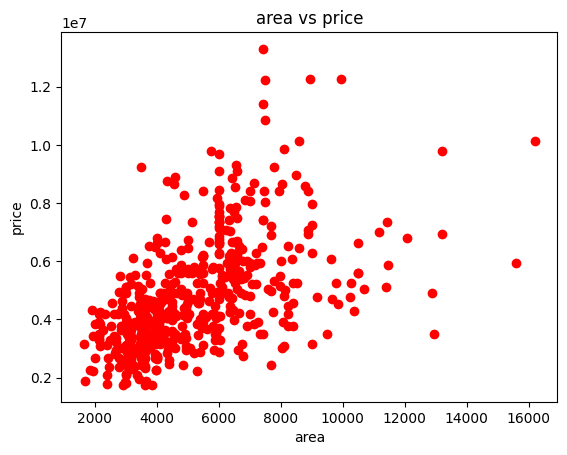

In [49]:
plt.scatter(df.area, df.price, color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('area vs price')
plt.show()

In [50]:
msk = np.random.rand(len(df)) < 0.8 
train = df[msk]
test = df[~msk] 

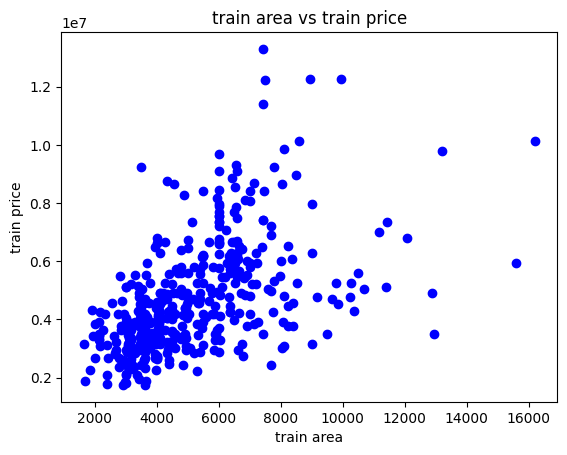

In [53]:
plt.scatter(train.area, train.price, color='blue') 
plt.xlabel('train area')
plt.ylabel('train price')
plt.title('train area vs train price')
plt.show()

In [54]:
from sklearn import linear_model 
regr = linear_model.LinearRegression() 
train_x = np.asanyarray(train[['area']]) 
train_y = np.asanyarray(train[['price']]) 
regr.fit(train_x, train_y) 

print('Coefficients is:', regr.coef_)
print('Intercept is:', regr.intercept_)

Coefficients is: [[462.11951913]]
Intercept is: [2334456.8629982]


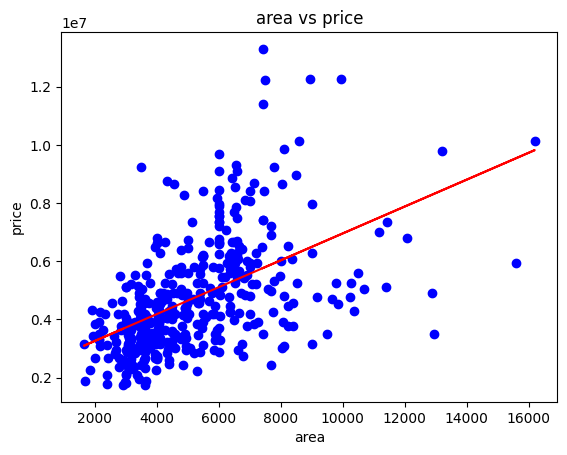

In [57]:
plt.scatter(train.area, train.price, color='blue') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') 
plt.xlabel('area')
plt.ylabel('price')
plt.title('area vs price')
plt.show()

In [60]:
from sklearn.metrics import r2_score 
test_x = np.asanyarray(test[['area']])
test_y = np.asanyarray(test[['price']]) 
test_y_ = regr.predict(test_x) 

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y))) 
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y)**2)) 
print('R2-score: %.2f' % r2_score(test_y, test_y_))

Mean absolute error: 1044662.52
Residual sum of squares (MSE): 1951277436234.41
R2-score: 0.33
